In [1]:
import numpy as np  
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import load_model
from processing_functions import * 

import os
os.chdir('../') # Go to the parent folder
from support_functions import *
from Autoencoder_Functions import *
os.chdir('Synthetic_2')

Using TensorFlow backend.


## Parameters

In [2]:
k = 50 # Define the k parameter for the precision at k

## Read Data

In [3]:
data, labels, data_train, data_test, labels_train, labels_test = read_data()
# The length of one image vector
img_size = data.shape[1]

## Load the Saved Models¶

### Autoencoder Model

In [4]:
# Generate and Compile a Deep Autoencoder
# Specify the model config
encoder_layers_size, decoder_layers_size = get_deep_model_config()
# Extract the saved model
autoencoder, encoder = compile_autoencoder(img_size,encoder_layers_size, decoder_layers_size) 
autoencoder = load_model('model_autoencoder.h5') # Load the saved model

/Users/ivanzhou/General_Software/anaconda/envs/carnd-term1/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


### Encoder Model

In [5]:
weights_encoder = autoencoder.get_weights()[0:4] # The first half of the autoencoder model is an encoder model
encoder.set_weights(weights_encoder) # Set weights

In [6]:
encoder.count_params()

308

In [7]:
print(encoder.summary())
print("\n The output shape of the encoder model: ")
print(encoder.output_shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
Total params: 308
Trainable params: 308
Non-trainable params: 0
_________________________________________________________________
None

 The output shape of the encoder model: 
(None, 8)


## Implement the Anomaly Detection¶with the Construction Error

In [8]:
data_train_encoded  = encode_data(autoencoder,data_train,image = False)
data_test_encoded = encode_data(autoencoder,data_test, image = False)

/Users/ivanzhou/General_Software/anaconda/envs/carnd-term1/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2289: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Finish evaluate Lambda: 0
Finish evaluate Lambda: 0.09
Finish evaluate Lambda: 0.18
Finish evaluate Lambda: 0.27
Finish evaluate Lambda: 0.36
Finish evaluate Lambda: 0.44999999999999996
Finish evaluate Lambda: 0.5399999999999999
Finish evaluate Lambda: 0.6299999999999999
Finish evaluate Lambda: 0.7199999999999999
Finish evaluate Lambda: 0.8099999999999998
Finish evaluate Lambda: 0.8999999999999998
Finish evaluate Lambda: 0.9899999999999998


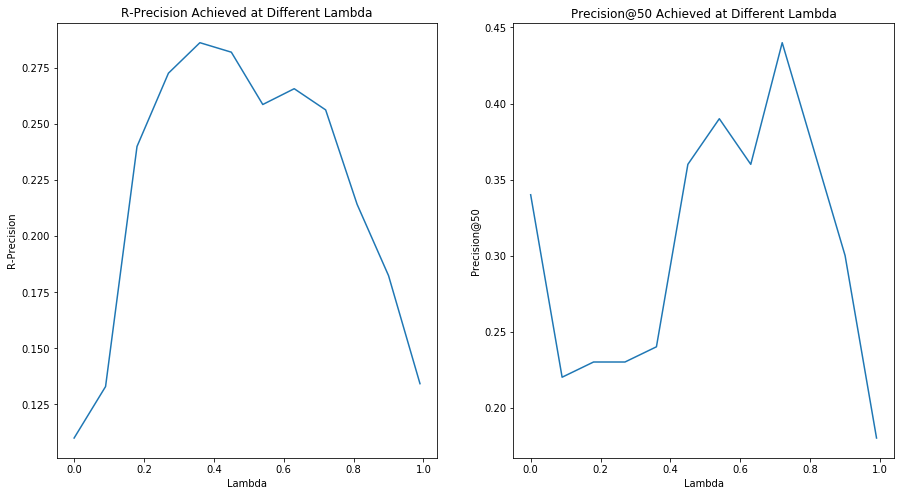

The best lambda selected from the cross validation is: 0.8999999999999998


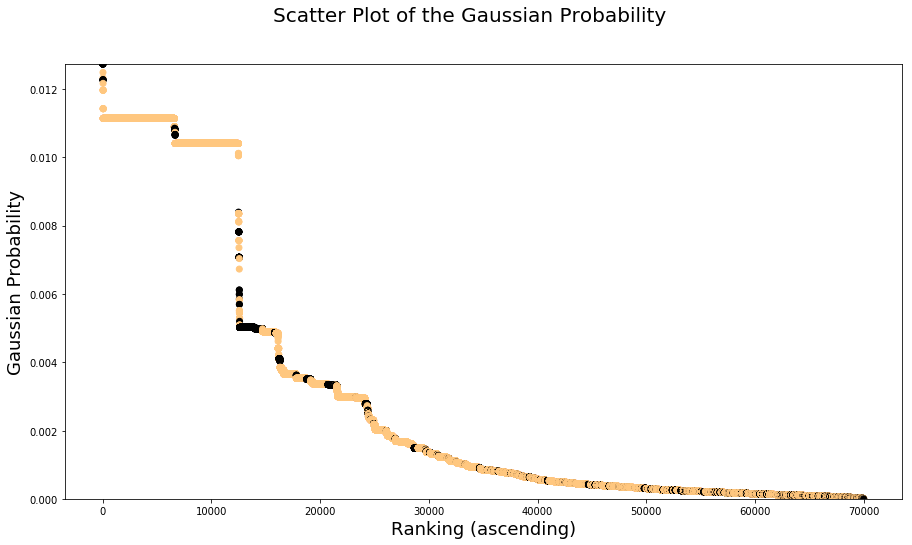

Training Results:
Precision: 15.9%
Recall: 99.2%
F-score: 27.4%
R-Precision (# R = 9222): 18.2%
Precision@50: 32.0%

Precision: 15.5%
Recall: 99.0%
F-score: 26.7%
R-Precision (# R = 3860): 17.4%
Precision@50: 18.0%


In [9]:
train_test_with_gaussian(data_train_encoded, data_test_encoded, labels_train, labels_test,k,whitened = True, plot_comparison = True)